# Dependencies

In [19]:
import os
import matplotlib.pyplot as plt
from matplotlib import rcParams
from datacollect import *

# Config

In [2]:
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 14
cm = 1 / 2.54

# Input parameters

In [3]:
# Dataset
year = 2018

# Input Dir (Simulations)
path_simulation = f'/Users/kristianboerger/working_files/ledsa/simulation/2018/testcases'
# Input Dir (MIREX)
path_mirex = '/Users/kristianboerger/working_files/ledsa/MIREX'

# Experimental Data

experiment = 'V004' # relevant for MIREX data
simulation_uc = 'V004' # relevant for simulation data
simulation_cc = 'V004_cc_complete' # relevant for simulation data

# Output Path
# path_output = '/home/kboerger/ledsa/analysis/plots'

# Get data

In [4]:
path_uc = os.path.join(path_simulation, simulation_uc, 'Cam_01')
path_cc = os.path.join(path_simulation, simulation_cc, 'Cam_01')
mirex_file = os.path.join(path_mirex, f'{year}_{experiment}.dat')

sim_uc = SimData(path_uc)
sim_cc = SimData(path_cc)
mirex_data = MirexData(mirex_file)

# LED intensities uncorrected (uc) vs color corrected (cc)

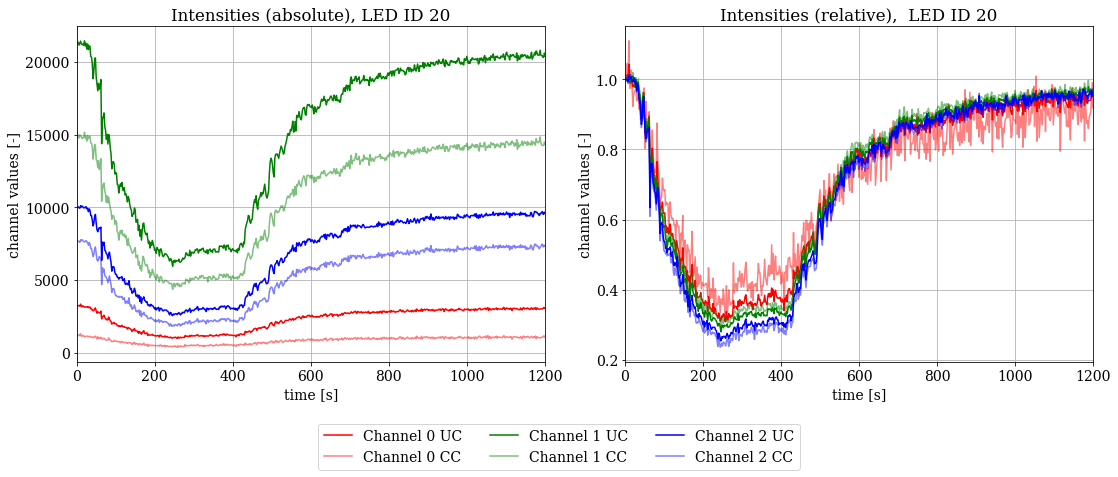

In [5]:
line = 3 # LED line
channel_list = [0,1,2] # Camera channel to analyse
color_list = ['red', 'green', 'blue'] # Coloring graphs of camera channels
min_time = 0 # Minimum datapoint
max_time = 1500 # Maximum datapoint

led_id = 20

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(40 * cm, 15 * cm))
for channel, color in zip(channel_list, color_list):
    led_params_uc = sim_uc.get_ledparams_at_line(channel,line,'sum_col_val', n_ref=False)
    led_params_cc = sim_cc.get_ledparams_at_line(channel,line,'sum_col_val_cc', n_ref=False)
    led_params_uc_norm = sim_uc.get_ledparams_at_line(channel,line,'sum_col_val', n_ref=10)
    led_params_cc_norm = sim_cc.get_ledparams_at_line(channel,line,'sum_col_val_cc', n_ref=10)
    ax1.plot(led_params_uc[led_id], color=color)
    ax1.plot(led_params_cc[led_id], color=color, alpha=0.5)
    ax2.plot(led_params_uc_norm[led_id], color=color, label=f"Channel {channel} UC")
    ax2.plot(led_params_cc_norm[led_id], color=color, alpha=0.5, label=f"Channel {channel} CC")

ax1.set_title(f"Intensities (absolute), LED ID {led_id}")
ax2.set_title(f"Intensities (relative),  LED ID {led_id}")

ax1.set_xlim(min_time, max_time)
ax2.set_xlim(min_time, max_time)

ax1.grid(True)
ax2.grid(True)
ax1.set_xlabel("time [s]")
ax2.set_xlabel("time [s]")
ax1.set_ylabel("channel values [-]")
ax2.set_ylabel("channel values [-]")

fig.legend(bbox_to_anchor=(0.5, -0.0), loc='upper center', ncol=3)
plt.tight_layout()



 # Extinction coefficients uncorrected (uc) vs color corrected (cc)

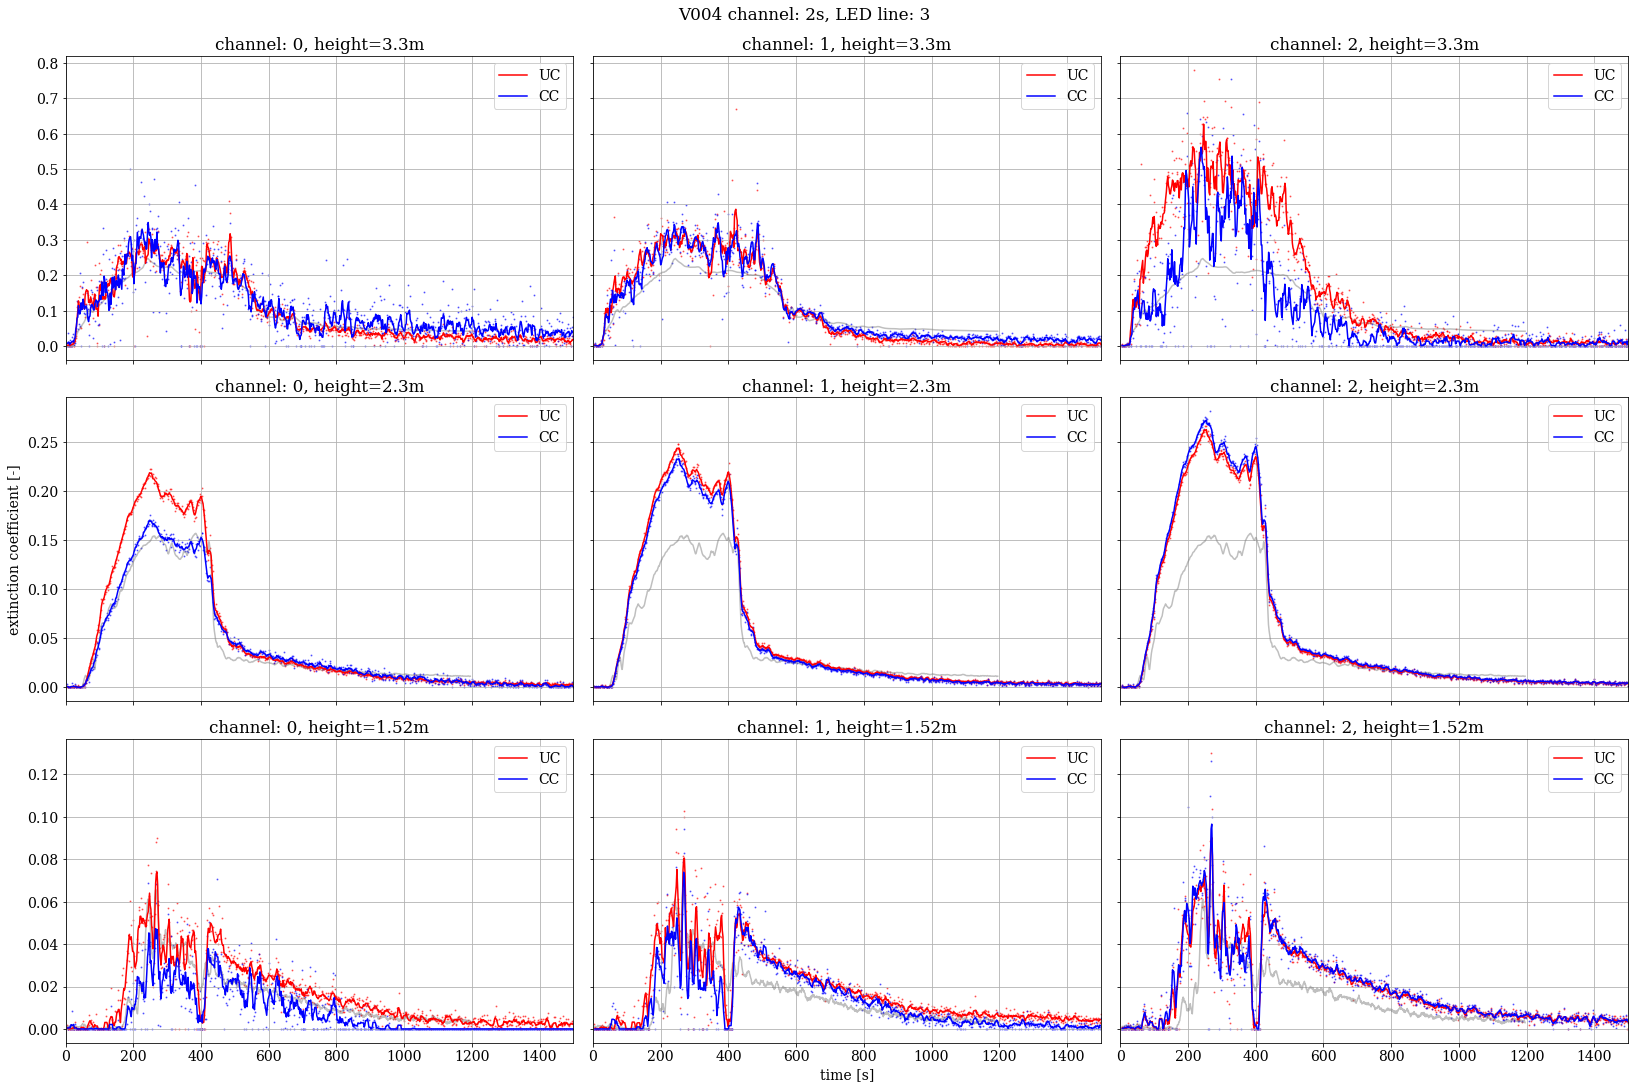

In [18]:
line = 3 # LED line
window_sim = 1 # Average window
channel_list = [0,1,2] # Camera channel to analyse
height_list = [3.3,2.3,1.52]  # Heights to analyse

# mirex_data.smooth_data(5)
mirex_list = [mirex_data.mirex_1, mirex_data.mirex_2, mirex_data.mirex_3]

min_time = 0 # Minimum datapoint
max_time = 1500 # Maximum datapoint

n_rows = len(height_list)
n_cols = len(channel_list)

fig, axs = plt.subplots(nrows=n_rows, ncols=n_cols, sharex=True, sharey="row", figsize=(60 * cm, 40 * cm))
for ax, height, mirex, y_lim in zip(axs, height_list, mirex_list):
    for channel in channel_list:
        layer = get_layer_from_height(1, 3.35, height, 20)
        extco_uc = sim_uc.get_extco_at_layer(channel,layer, window_sim)
        extco_uc_org = sim_uc.get_extco_at_layer(channel,layer, 1)
        extco_cc = sim_cc.get_extco_at_layer(channel,layer, window_sim)
        extco_cc_org = sim_cc.get_extco_at_layer(channel,layer, 1)

        ax[channel].plot(mirex, color='gray', alpha=0.5)
        ax[channel].plot(extco_uc.index,extco_uc[line], color='red', label="UC")
        ax[channel].scatter(extco_uc_org.index, extco_uc_org[line], color='red', s=1, alpha=0.5)
        ax[channel].plot(extco_cc[line], color='blue',label="CC")
        ax[channel].scatter(extco_cc_org.index, extco_cc_org[line], color='blue', s=1, alpha=0.5)
        ax[channel].grid(True)
        ax[channel].set_xlim(min_time, max_time)
        ax[channel].set_title(f"channel: {channel}, height={height}m")
        ax[channel].legend(loc='upper right')

fig.add_subplot(111, frameon=False)
fig.suptitle(f"{experiment} channel: {channel}s, LED line: {line}")
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("time [s]")
plt.ylabel("extinction coefficient [-]",labelpad=15)
plt.tight_layout()